In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_IxoE5JN.csv')
df.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [12]:
df.shape

(94992, 3)

In [3]:
df.isnull().sum()

row_id         0
datetime       0
energy      1900
dtype: int64

In [4]:
test_df = pd.read_csv('test_WudNWDM.csv')
test_df.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [7]:
test_df.shape

(26304, 2)

In [8]:
test_df.isnull().sum()

row_id      0
datetime    0
dtype: int64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [24]:
df.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [25]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB


In [29]:
main_df = df[['datetime','energy']]
main_df

,datetime,energy
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500
...,...,...
94987,2018-12-31 19:00:00,2528.446800
94988,2018-12-31 20:00:00,2461.883600
94989,2018-12-31 21:00:00,2365.994400
94990,2018-12-31 22:00:00,2342.942800


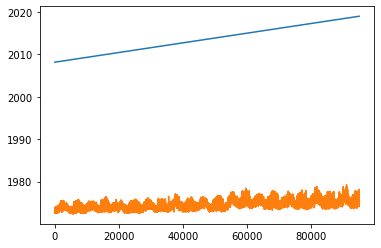

In [31]:
plt.plot(main_df)

In [13]:
df1 = df['energy']
df1

0        1259.985563
1        1095.541500
2        1056.247500
3        1034.742000
4        1026.334500
            ...     
94987    2528.446800
94988    2461.883600
94989    2365.994400
94990    2342.942800
94991    2180.217600
Name: energy, Length: 94992, dtype: float64

In [17]:
df1.isnull().sum()

1900

In [14]:
scale_df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
scale_df1

array([[0.1569359 ],
       [0.09136838],
       [0.07570098],
       ...,
       [0.59792632],
       [0.58873514],
       [0.52385297]])

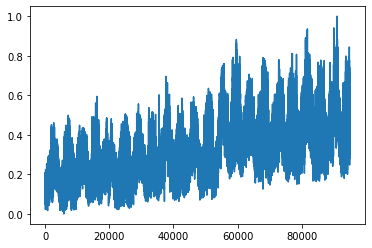

In [16]:
plt.plot(scale_df1)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df['datetime']
y = df['energy']

In [ ]:
X_train, X-test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42, shuffle=False, stratify=None)